<a href="https://colab.research.google.com/github/Felipe-DelosSantos09/Diplomado-IA/blob/master/Clasificaci%C3%B3n_de_tomate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
import cv2
import zipfile
import io

In [4]:
!cp /content/drive/MyDrive/Base_Datos_Tomates.zip ../

In [5]:
!unzip /content/drive/MyDrive/Base_Datos_Tomates.zip -d /content/drive/MyDrive/CLASIFICACION_TOMATES

Archive:  /content/drive/MyDrive/Base_Datos_Tomates.zip
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (14).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (22).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (13).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (61).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (23).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (54).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_rona (52).jpg  
  inflating: /content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates/Validation/5_RojoNaranja/5_

In [10]:
import os

base_dir = '/content/drive/MyDrive/CLASIFICACION_TOMATES/Base_Datos_Tomates'

train_dir =      os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir =       os.path.join(base_dir, 'Test')

# Directorio con las imagenes de training
train_1_verde_dir = os.path.join(train_dir, '1_Verde')
train_2_quebrado_dir = os.path.join(train_dir, '2_Quebrado')
train_3_rayado_dir = os.path.join(train_dir, '3_Rayado')
train_4_naranja_dir = os.path.join(train_dir, '4_Naranja')
train_5_rojonaranja_dir = os.path.join(train_dir, '5_RojoNaranja')
train_6_rojo_dir = os.path.join(train_dir, '6_Rojo')

# Directorio con las imagenes de validation
validation_1_verde_dir = os.path.join(validation_dir, '1_Verde')
validation_2_quebrado_dir = os.path.join(validation_dir, '2_Quebrado')
validation_3_rayado_dir = os.path.join(validation_dir, '3_Rayado')
validation_4_naranja_dir = os.path.join(validation_dir, '4_Naranja')
validation_5_rojonaranja_dir = os.path.join(validation_dir, '5_RojoNaranja')
validation_6_rojo_dir = os.path.join(validation_dir, '6_Rojo')

# Directorio con las imagenes de test
test_1_verde_dir = os.path.join(test_dir, '1_Verde')
test_2_quebrado_dir = os.path.join(test_dir, '2_Quebrado')
test_3_rayado_dir = os.path.join(test_dir, '3_Rayado')
test_4_naranja_dir = os.path.join(test_dir, '4_Naranja')
test_5_rojonaranja_dir = os.path.join(test_dir, '5_RojoNaranja')
test_6_rojo_dir = os.path.join(test_dir, '6_Rojo')


In [11]:
print('total imagenes entrenamiento 1_Verde :', len(os.listdir(train_1_verde_dir) ))
print('total imagenes entrenamiento 2_Quebrado :', len(os.listdir(train_2_quebrado_dir) ))
print('total imagenes entrenamiento 3_Rayado :', len(os.listdir(train_3_rayado_dir) ))
print('total imagenes entrenamiento 4_Naranja :', len(os.listdir(train_4_naranja_dir) ))
print('total imagenes entrenamiento 5_RojoNaranja :', len(os.listdir(train_5_rojonaranja_dir) ))
print('total imagenes entrenamiento 6_Rojo :', len(os.listdir(train_6_rojo_dir)))

print('total imagenes entrenamiento 1_Verde :', len(os.listdir(validation_1_verde_dir) ))
print('total imagenes entrenamiento 2_Quebrado :', len(os.listdir(validation_2_quebrado_dir) ))
print('total imagenes entrenamiento 3_Rayado :', len(os.listdir(validation_3_rayado_dir) ))
print('total imagenes entrenamiento 4_Naranja :', len(os.listdir(validation_4_naranja_dir) ))
print('total imagenes entrenamiento 5_RojoNaranja :', len(os.listdir(validation_5_rojonaranja_dir) ))
print('total imagenes entrenamiento 6_Rojo :', len(os.listdir(validation_6_rojo_dir)))

print('total imagenes entrenamiento 1_Verde :', len(os.listdir(test_1_verde_dir) ))
print('total imagenes entrenamiento 2_Quebrado :', len(os.listdir(test_2_quebrado_dir) ))
print('total imagenes entrenamiento 3_Rayado :', len(os.listdir(test_3_rayado_dir) ))
print('total imagenes entrenamiento 4_Naranja :', len(os.listdir(test_4_naranja_dir) ))
print('total imagenes entrenamiento 5_RojoNaranja :', len(os.listdir(test_5_rojonaranja_dir) ))
print('total imagenes entrenamiento 6_Rojo :', len(os.listdir(test_6_rojo_dir)))



total imagenes entrenamiento 1_Verde : 400
total imagenes entrenamiento 2_Quebrado : 400
total imagenes entrenamiento 3_Rayado : 400
total imagenes entrenamiento 4_Naranja : 400
total imagenes entrenamiento 5_RojoNaranja : 400
total imagenes entrenamiento 6_Rojo : 400
total imagenes entrenamiento 1_Verde : 100
total imagenes entrenamiento 2_Quebrado : 100
total imagenes entrenamiento 3_Rayado : 100
total imagenes entrenamiento 4_Naranja : 100
total imagenes entrenamiento 5_RojoNaranja : 100
total imagenes entrenamiento 6_Rojo : 100
total imagenes entrenamiento 1_Verde : 200
total imagenes entrenamiento 2_Quebrado : 200
total imagenes entrenamiento 3_Rayado : 200
total imagenes entrenamiento 4_Naranja : 200
total imagenes entrenamiento 5_RojoNaranja : 200
total imagenes entrenamiento 6_Rojo : 200


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(256, 256))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=100,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256),
                                                         shuffle = False)


Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [39]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv2':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [53]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(4096, activation='relu'))
modelFT.add(Dense(512, activation='relu'))
modelFT.add(Dense(6, activation='sigmoid'))

modelFT.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 4096)              134221824 
                                                                 
 dense_16 (Dense)            (None, 512)               2097664   
                                                                 
 dense_17 (Dense)            (None, 6)                 3078      
                                                                 
Total params: 151037254 (576.16 MB)
Trainable params: 141042182 (538.03 MB)
Non-trainable params: 9995072 (38.13 MB)
_________________________________________________________________


In [54]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [55]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

24
6


In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [57]:
checkpoint_VGG16_FT = ModelCheckpoint(filepath="pesos_VGG16_FT.weights.best.hdf5",save_best_only=True,verbose=1)

In [58]:
early_stop= EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,mode="min")

In [59]:
historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 10,
            validation_steps = validation_steps,
            verbose = 2,callbacks=[checkpoint_VGG16_FT,early_stop])

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.32649, saving model to pesos_VGG16_FT.weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 - 22s - loss: 1.9996 - acc: 0.4421 - val_loss: 1.3265 - val_acc: 0.5783 - 22s/epoch - 932ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.32649 to 1.12745, saving model to pesos_VGG16_FT.weights.best.hdf5
24/24 - 23s - loss: 0.7537 - acc: 0.7146 - val_loss: 1.1274 - val_acc: 0.5700 - 23s/epoch - 944ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.12745 to 1.04882, saving model to pesos_VGG16_FT.weights.best.hdf5
24/24 - 22s - loss: 0.4791 - acc: 0.8058 - val_loss: 1.0488 - val_acc: 0.6767 - 22s/epoch - 909ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.04882 to 0.82576, saving model to pesos_VGG16_FT.weights.best.hdf5
24/24 - 23s - loss: 0.3024 - acc: 0.8946 - val_loss: 0.8258 - val_acc: 0.7633 - 23s/epoch - 953ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.82576
24/24 - 20s - loss: 0.1600 - acc: 0.9429 - val_loss: 0.9204 - val_acc: 0.7683 - 20s/epoch - 833ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.82576
24/24 - 17s - loss: 0.1737 -

In [60]:
modelFT.load_weights("/content/pesos_VGG16_FT.weights.best.hdf5")

In [61]:
import numpy as np

In [62]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

12/12 [==============================] - 7s 540ms/step - loss: 1.8053 - acc: 0.5200
Test Accuracy: 0.5199999809265137


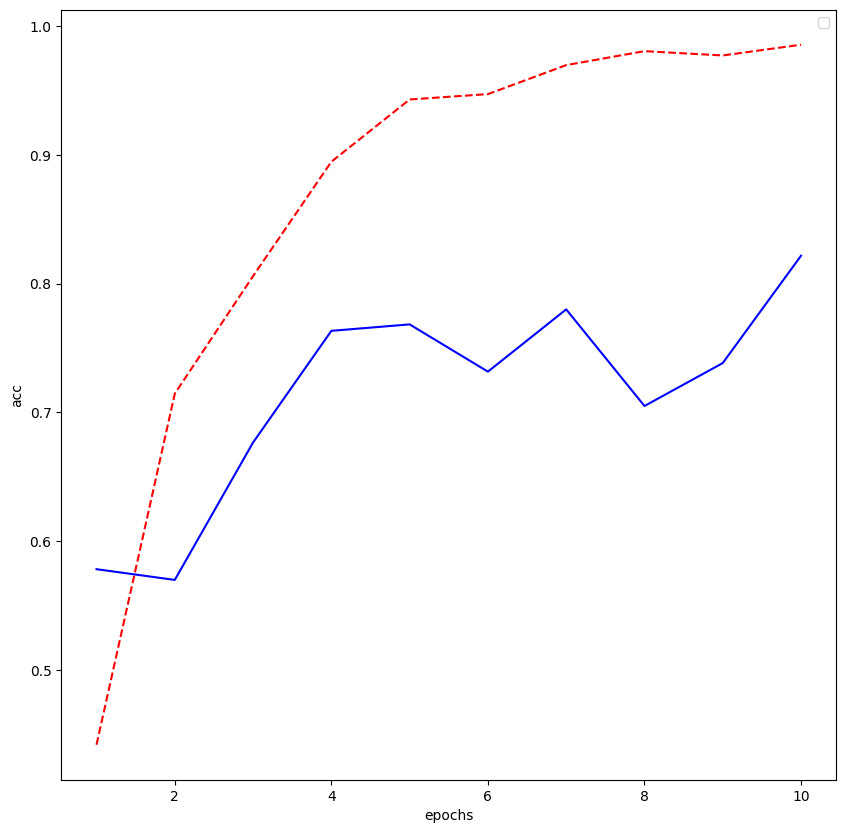

In [63]:
import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     acc, 'r--', label=''  )
ax.plot  ( epochs, val_acc,  'b', label='')
ax.set_title ("")
ax.set_ylabel('acc')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Accuracy VGG16_FT.png")
f.savefig("Training and Validation Accuracy VGG16_FT.eps")

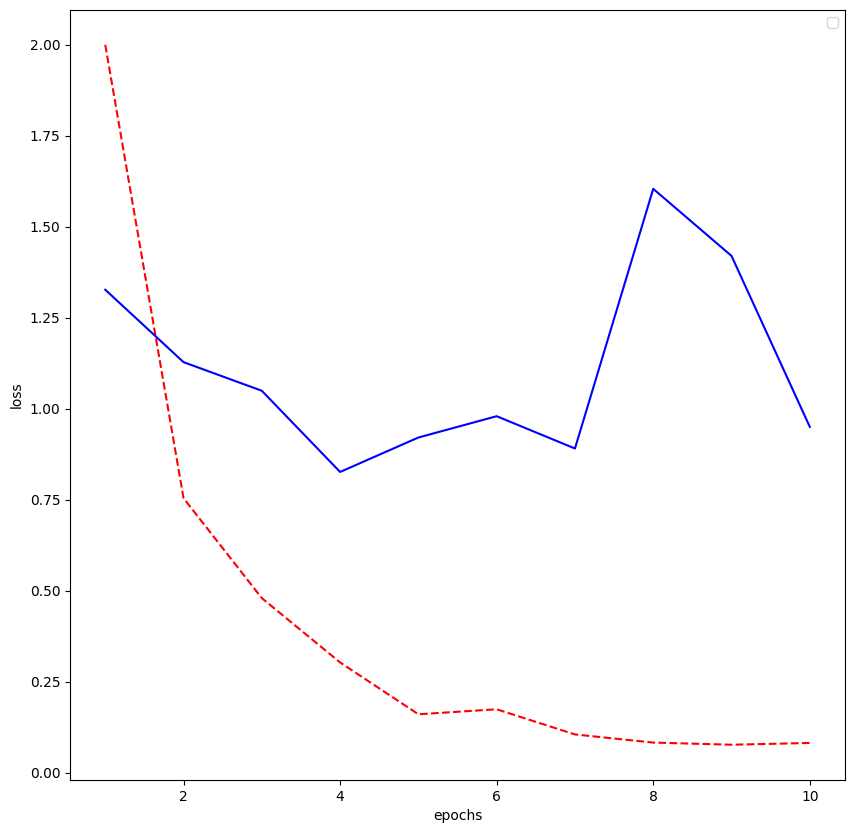

In [64]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     loss, 'r--', label=''  )
ax.plot  ( epochs, val_loss ,  'b', label='' )
ax.set_title ("")
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Loss VGG16_FT.png")
f.savefig("Training and Validation Loss VGG16_FT.eps")

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [66]:
import numpy as np
import seaborn as sns

In [67]:
# Funcion que permite graficar las matrices de confusion
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

12/12 [==============================] - 7s 572ms/step


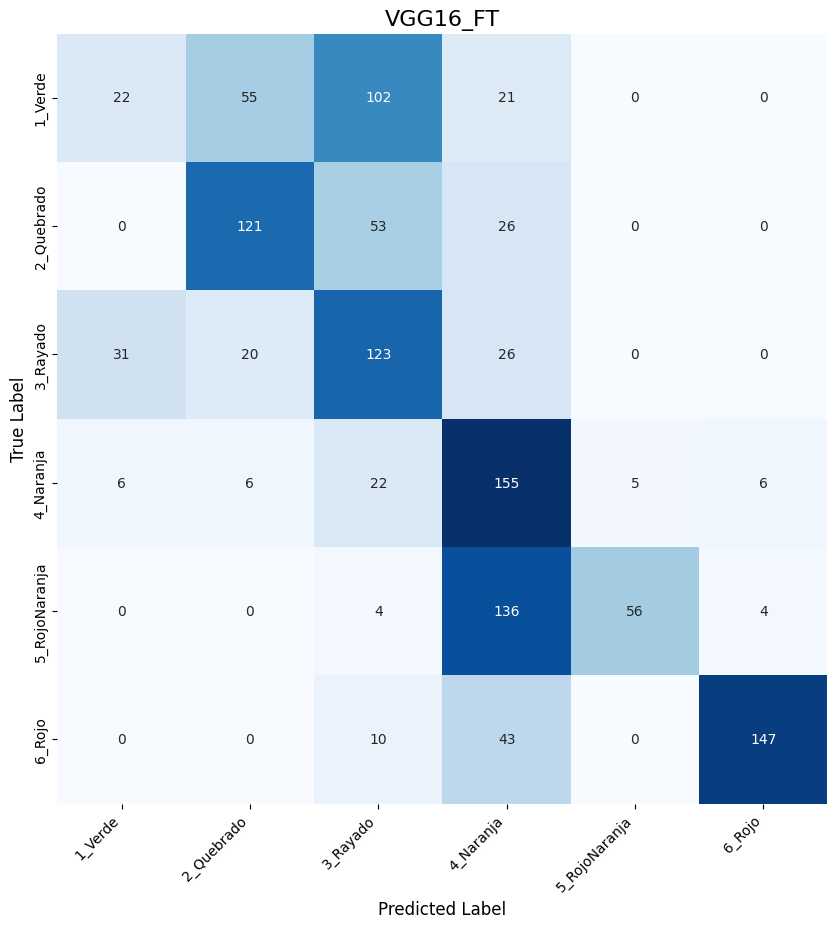

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_heatmap(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), test_generator.class_indices.keys() , ax, title="VGG16_FT")
fig.savefig("VGG16_FT matrix_confusion.png")
fig.savefig("VGG16_FT matrix_confusion.eps")

In [69]:
print(classification_report(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), target_names=test_generator.class_indices ))

12/12 [==============================] - 7s 561ms/step
               precision    recall  f1-score   support

      1_Verde       0.37      0.11      0.17       200
   2_Quebrado       0.60      0.60      0.60       200
     3_Rayado       0.39      0.61      0.48       200
    4_Naranja       0.38      0.78      0.51       200
5_RojoNaranja       0.92      0.28      0.43       200
       6_Rojo       0.94      0.73      0.82       200

     accuracy                           0.52      1200
    macro avg       0.60      0.52      0.50      1200
 weighted avg       0.60      0.52      0.50      1200



In [70]:
import pandas as pd

# assuming you stored your model.fit results in a 'history' variable:
#history = model.fit(x_train, y_train, epochs=10)

# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(historyFT.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)